<a href="https://colab.research.google.com/github/Woobin-Seo/Python/blob/master/random_forest/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn import tree
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals.six import StringIO
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [0]:
with open('./titanic.csv', 'r')as csvfile:
    titanic_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    #特徴量の名前が書かれたHeaderを読み取る
    csv_header = next(titanic_reader)
    feature_names = np.array(csv_header)
    
    #データと正解ラベルを読み取る
    titanic_x, titanic_y = [],[]
    
    for row in titanic_reader:
        titanic_x.append(row)
        titanic_y.append(row[1]) #正解ラベルは2列目の"survived"
        
    titanic_x = np.array(titanic_x) #型をリストからnumpy.ndarrayにする
    titanic_y = np.array(titanic_y) #型をリストからnumpy.ndarrayにする

print(feature_names)
print(titanic_x[0], titanic_y[0])

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['1' '0' '3' 'Braund, Mr. Owen Harris' 'male' '22' '1' '0' 'A/5 21171'
 '7.25' '' 'S'] 0


In [0]:
#class(2), age(5), sex(4)を残す
titanic_x = titanic_x[:, [2,5,4]]
feature_names = feature_names[[2, 5, 4]]

In [0]:
print(feature_names)
print(titanic_x[2], titanic_y[2])

['Pclass' 'Age' 'Sex']
['3' '26' 'female'] 1


In [0]:
#年齢の欠損値を平均値で埋める
ages = titanic_x[:,1]

In [0]:
#NA以外のageの平均値を計算する
mean_age = np.mean(titanic_x[ages != '', 1].astype(float))

In [0]:
#ageがNAのものを平均値に置き換える
titanic_x[titanic_x[:, 1] == '', 1] = mean_age

## sexのラベルのデータをEncoding : female→0、male→1

In [0]:
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x[:,2])

print('Categorical classes:', label_encoder.classes_)

Categorical classes: ['female' 'male']


In [0]:
integer_classes = label_encoder.transform(label_encoder.classes_)

print('integer classes:', integer_classes)

integer classes: [0 1]


In [0]:
t = label_encoder.transform(titanic_x[:, 2])
titanic_x[:, 2] = t

In [0]:
print(feature_names)
print(titanic_x[2], titanic_y[2])

['Pclass' 'Age' 'Sex']
['3' '26' '0'] 1


## pclassのラベルのデータをEncoding

In [0]:
enc = LabelEncoder()
label_encoder = enc.fit(titanic_x[:, 0])

print('Categorical classes:', label_encoder.classes_)

Categorical classes: ['1' '2' '3']


In [0]:
integer_classes = label_encoder.transform(label_encoder.classes_).reshape(3, 1)

print('Integer classes:', integer_classes)

Integer classes: [[0]
 [1]
 [2]]


In [0]:
enc = OneHotEncoder()
one_hot_encoder = enc.fit(integer_classes)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
#最初に、Label Encoderを使ってpclassを0~2に直す
num_of_rows = titanic_x.shape[0]
t = label_encoder.transform(titanic_x[:, 0]).reshape(num_of_rows, 1)

In [0]:
#次に、OneHotEncoderを使ってデータを1,0に変換
new_features = one_hot_encoder.transform(t)

In [0]:
#1,0に直してデータを統合する
titanic_x =np.concatenate([titanic_x, new_features.toarray()], axis=1)

In [0]:
#OneHotEncoderをする前にpclassのデータを削除する
titanic_x = np.delete(titanic_x, [0], 1)

In [0]:
#特徴量の名前を更新する
feature_names = ['age', 'sex', 'first class', 'second class', 'third class']

In [0]:
#数値を変換
titanic_x = titanic_x.astype(float)
titanic_y = titanic_y.astype(float)

In [0]:
print(feature_names)
print(titanic_x[0], titanic_y[0])

['age', 'sex', 'first class', 'second class', 'third class']
[22.  1.  0.  0.  1.] 0.0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.25, random_state=0)

In [0]:
def measure_performance(x, y, clf, show_accuracy=True, show_classification_report=True,
                       show_confussion_matrix=True):
    y_pred=clf.predict(x)
    
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")
    
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
clf = clf.fit(x_train, y_train)

In [0]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=['Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf("tree.pdf")

In [0]:
#決定キーモデルの評価
measure_performance(x_train, y_train, clf)

Accuracy:0.816 

Classification report
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       410
         1.0       0.79      0.72      0.75       258

   micro avg       0.82      0.82      0.82       668
   macro avg       0.81      0.80      0.80       668
weighted avg       0.81      0.82      0.81       668
 

Confussion matrix
[[360  50]
 [ 73 185]] 



# ======= 回帰 =======

In [0]:
#データの読み込み
boston = load_boston()
df = DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = np.array(boston.target)

In [0]:
#説明変数及び目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values

In [0]:
#学習用、検証用データに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
#モデルの構築
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
#予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [0]:
#MSEの計算
print('MSE train : %.3f, test : %3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train : 1.969, test : 16.849144


In [0]:
#R^2の計算
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), 
                                         r2_score(y_test, y_test_pred)))

MSE train : 0.977, test : 0.798


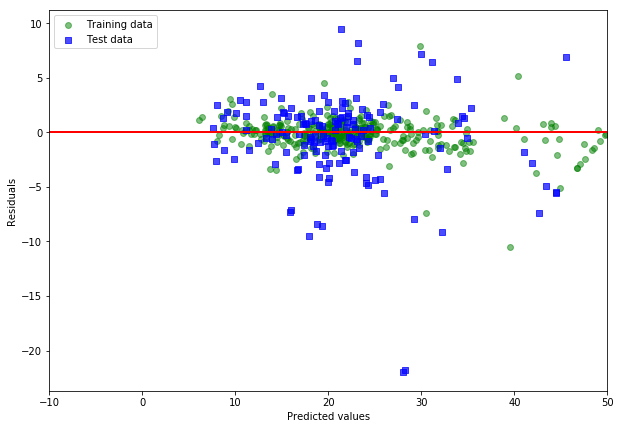

In [0]:
# 残差プロット
# %matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c='green', marker='o',
           s=35, alpha=0.5, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='s',
           s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()